In [1]:

%load_ext autoreload
%autoreload 2
import json, os, cv2
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import xarray as xr
import seaborn as sns
import h5py as hf
from tqdm import tqdm
from tqdm import tqdm
import itertools 
from scipy.interpolate import interp1d
from scipy import signal
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import os, fnmatch
from scipy.spatial.distance import cdist
import matplotlib.gridspec as gridspec
from random import sample
from scipy.ndimage import gaussian_filter1d
from matplotlib.collections import LineCollection


import sys
sys.path.insert(0, 'C:/Users/nlab/Documents/GitHub/obstacle_avoidance')

from utils.base_functions import *
from src.utils.auxiliary import flatten_series
from src.utils.path import find
from src.base import BaseInput
from plots.plots import *


import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
c:\Users\nlab\anaconda3\envs\ephys0\lib\site-packages\deeplabcut\__init__.py:78: UserWarning: 
        As PyTorch is not installed, unsupervised identity learning will not be available.
        Please run `pip install torch`, or ignore this warning.
        
  warnings.warn(


In [4]:
def by_start_obstalce_average(self,date):
        savepath = "D:/obstacle_avoidance/recordings"
        savepath_session = os.path.join(*[savepath,'figures'])
        #savepath_session = os.path.join(*[savepath,str(pd.unique(self.df.date).item()),str(pd.unique(self.df.animal).item()),str(pd.unique(self.df.task).item())])
        pdf = PdfPages(os.path.join((savepath_session), str(date)+ 'by_' +'_start_'+'obstacle' + 'consecutive.pdf'))
        key='start'
        fig = plt.figure(constrained_layout=False, figsize=(20, 10),dpi=90)
        fig.suptitle('by ' + key + ' '+ 'and ' +'obstacle ')
        spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)


        """Right"""
        panel_1 = gridspec.GridSpecFromSubplotSpec(3,2,subplot_spec=spec2[0])
        ax1 = fig.add_subplot(panel_1[0,0])
        plot_arena(self.df,ax1)
        ax2 = fig.add_subplot(panel_1[0,1])
        plot_arena(self.df,ax2)
        ax2.set_title('right')
        ax3 = fig.add_subplot(panel_1[1,0])
        plot_arena(self.df,ax3)
        ax4 = fig.add_subplot(panel_1[1,1])
        plot_arena(self.df,ax4)
        ax5 = fig.add_subplot(panel_1[2,0])
        plot_arena(self.df,ax5)
        ax6 = fig.add_subplot(panel_1[2,1])
        plot_arena(self.df,ax6)

        right_axs = [ax1,ax2,ax3,ax4,ax5,ax6]


        """Left """
        panel_2 = gridspec.GridSpecFromSubplotSpec(3,2,subplot_spec=spec2[1])
        ax7 = fig.add_subplot(panel_2[0,0])
        plot_arena(self.df,ax7)
        ax8 = fig.add_subplot(panel_2[0,1])
        plot_arena(self.df,ax8)
        ax8.set_title('left')
        ax9 = fig.add_subplot(panel_2[1,0])
        plot_arena(self.df,ax9)
        ax10 = fig.add_subplot(panel_2[1,1])
        plot_arena(self.df,ax10)
        ax11= fig.add_subplot(panel_2[2,0])
        plot_arena(self.df,ax11)
        ax12 = fig.add_subplot(panel_2[2,1])
        plot_arena(self.df,ax12)

        left_axs = [ax7,ax8,ax9,ax10,ax11,ax12]




        """ plot trials"""
        right_obstacle_dict = dict(zip(pd.unique(self.df['obstacle_cluster'].sort_values().to_list()),right_axs))
        left_obstacle_dict = dict(zip(pd.unique(self.df['obstacle_cluster'].sort_values().to_list()),left_axs))

        for direction, direction_frame in self.df.groupby(['odd']):
            for cluster, cluster_frame in direction_frame.groupby(['obstacle_cluster']):
                #cluster_frame = cluster_frame.sample(num_sample)
                right_obstacle_axis = right_obstacle_dict.get(cluster)
                left_obstacle_axis = left_obstacle_dict.get(cluster)
                plot_obstacle(cluster_frame,right_obstacle_axis,cluster)
                plot_obstacle(cluster_frame,left_obstacle_axis,cluster)
                right_obstacle_axis.set_title(str(cluster))
                left_obstacle_axis.set_title(str(cluster))

                for start, start_frame in cluster_frame.groupby(['start']):

                    if direction == 'right':
                        if start == 'top':
                            if cluster in [2,3]:
                                right_obstacle_axis.plot(np.linspace(10,50,50),start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0],c = 'black')
                                right_obstacle_axis.fill_between(np.linspace(10,50,50), start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)+start_frame['mad_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)-start_frame['mad_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), facecolor='black', alpha=0.5)

                            else:
                                right_obstacle_axis.plot(np.linspace(10,50,50),start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0],c = 'black')
                                right_obstacle_axis.fill_between(np.linspace(10,50,50), start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)+start_frame['std_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)-start_frame['std_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), facecolor='black', alpha=0.5)
                        if start == 'bottom':
                            if cluster in [2,3]:
                                right_obstacle_axis.plot(np.linspace(10,50,50),start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0],c = 'red')
                                right_obstacle_axis.fill_between(np.linspace(10,50,50), start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)+start_frame['mad_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)-start_frame['mad_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), facecolor='red', alpha=0.5)
                            else:
                                right_obstacle_axis.plot(np.linspace(10,50,50),start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0],c = 'red')
                                right_obstacle_axis.fill_between(np.linspace(10,50,50), start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)+start_frame['std_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)-start_frame['std_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), facecolor='red', alpha=0.5)


                    if direction == 'left':
                        if start == 'top':
                             if cluster in [2,3]:
                                left_obstacle_axis.plot(np.linspace(10,50,50),start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0],c = 'black')
                                left_obstacle_axis.fill_between(np.linspace(10,50,50), start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)+start_frame['mad_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)-start_frame['mad_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), facecolor='black', alpha=0.5)
                             else:
                                left_obstacle_axis.plot(np.linspace(10,50,50),start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0],c = 'black')
                                left_obstacle_axis.fill_between(np.linspace(10,50,50), start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)+start_frame['std_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)-start_frame['std_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), facecolor='black', alpha=0.5)
                        if start == 'bottom':
                            if cluster in [2,3]:
                                left_obstacle_axis.plot(np.linspace(10,50,50),start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0],c = 'red')
                                left_obstacle_axis.fill_between(np.linspace(10,50,50), start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)+start_frame['mad_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)-start_frame['mad_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), facecolor='red', alpha=0.5)

                            else:
                                left_obstacle_axis.plot(np.linspace(10,50,50),start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0],c = 'red')
                                left_obstacle_axis.fill_between(np.linspace(10,50,50), start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)+start_frame['std_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)-start_frame['std_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), facecolor='red', alpha=0.5)

        pdf.savefig(); plt.close()
        pdf.close()

In [21]:
session = plot_oa(r"D:\obstacle_avoidance\metadata\compiled_data\G8CK1_G8CK_light.json",'blank')
session.gather_session_df('obstacle',6)

6


In [28]:

session.df.to_hdf('D:/obstacle_avoidance/metadata/compiled_data/h5/light.h5','w')

In [15]:
string = 'whitewhite'

print(string.rfind('noise'),string.find('white'))

-1 0


In [18]:
import itertools
from itertools import permutations
 
# initialize lists
list_1 = [ 'white','black','noise']
list_2 = [ 'white','black','noise']
 
unique_combinations = []
 
for i in range(len(list_1)):
    for j in range(len(list_2)):
        unique_combinations.append((list_1[i], list_2[j]))
 
print(unique_combinations)

[('white', 'white'), ('white', 'black'), ('white', 'noise'), ('black', 'white'), ('black', 'black'), ('black', 'noise'), ('noise', 'white'), ('noise', 'black'), ('noise', 'noise')]


In [235]:
session.by_start_obstalce_average('light')

In [30]:
dark = plot_oa(r"D:\obstacle_avoidance\metadata\compiled_data\G8CK1_G8CK_dark.json",'blank')
dark.gather_session_df('obstacle',6)
dark.df.to_hdf('D:/obstacle_avoidance/metadata/compiled_data/h5/dark.h5','w')

6


In [39]:
session.df.cluster

AttributeError: 'DataFrame' object has no attribute 'cluster'

In [2]:
conditions = plot_oa(r"D:\obstacle_avoidance\metadata\compiled_data\G8CK1_G8CK_oa_07_08.json",'blank')
conditions.gather_session_df('obstacle',6)
#conditions.df.to_hdf('D:/obstacle_avoidance/metadata/compiled_data/h5/conditions.h5','w')

6


In [3]:
to_drop = [i for i in conditions.df.columns if "mean_mean" in i]
df = conditions.df.drop(columns = to_drop)

In [64]:
batch_size = 1000
for i, df_chunk in df.groupby(np.arange(df.shape[0]) // batch_size):
    df_chunk.to_hdf('D:/obstacle_avoidance/metadata/compiled_data/h5/conditions.h5','table', complib= 'blosc:lz4',mode='a')

In [4]:
df = conditions.df.drop(columns = to_drop)

In [5]:
df

,level_0,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,...,std_interp_ts_nose_y_cm,mad_interp_ts_nose_y_cm,animal_mean_interp_ts_nose_y_cm,animal_median_interp_ts_nose_y_cm,animal_std_interp_ts_nose_y_cm,animal_mad_interp_ts_nose_y_cm,date_mean_interp_ts_nose_y_cm,date_median_interp_ts_nose_y_cm,date_std_interp_ts_nose_y_cm,date_mad_interp_ts_nose_y_cm
0,0,0,60956.057548,60958.986316,"[60956.064755, 60956.081574, 60956.098918, 609...","[74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 8...","[98.219970703125, 98.28543853759766, 97.297500...","[258.87322998046875, 258.2541198730469, 257.01...","[107.9310073852539, 107.84115600585938, 107.66...","[266.6334533691406, 266.1789245605469, 265.581...",...,"[1.704215957581921, 1.7213475879672797, 1.7144...","[0.8372520181144996, 0.8399219579395094, 0.846...","[14.798852080643828, 14.791549217630285, 14.78...","[15.018471608027324, 15.018471608027324, 15.01...","[1.6374928205447663, 1.6281039149045344, 1.623...","[0.7211336716399082, 0.7211336716399082, 0.718...","[12.895512146474108, 12.895512146474108, 12.89...","[12.743317597940582, 12.743317597940582, 12.74...","[1.5638462442158316, 1.5638462442158316, 1.563...","[1.6199748059719585, 1.6199748059719585, 1.619..."
1,1,2,60965.491417,60967.347059,"[60965.501145, 60965.518067, 60965.535436, 609...","[640, 641, 642, 643, 644, 645, 646, 647, 648, ...","[96.29674530029297, 95.56669616699219, 95.6471...","[254.7836456298828, 254.9083709716797, 255.394...","[101.49925231933594, 100.67830657958984, 100.9...","[262.8636169433594, 263.4535217285156, 263.921...",...,"[1.704215957581921, 1.7213475879672797, 1.7144...","[0.8372520181144996, 0.8399219579395094, 0.846...","[14.798852080643828, 14.791549217630285, 14.78...","[15.018471608027324, 15.018471608027324, 15.01...","[1.6374928205447663, 1.6281039149045344, 1.623...","[0.7211336716399082, 0.7211336716399082, 0.718...","[12.895512146474108, 12.895512146474108, 12.89...","[12.743317597940582, 12.743317597940582, 12.74...","[1.5638462442158316, 1.5638462442158316, 1.563...","[1.6199748059719585, 1.6199748059719585, 1.619..."
2,2,3,60967.347059,60970.579136,"[60967.352576, 60967.368652, 60967.385523, 609...","[[751, 752, 753, 754, 755, 756, 757, 758, 759,...","[675.3671875, 676.18701171875, 676.38055419921...","[267.5236511230469, 267.6513671875, 268.050109...","[667.2891235351562, 669.3956298828125, 669.599...","[254.7681121826172, 253.37440490722656, 253.36...",...,"[2.059087435362894, 2.3323731770032605, 2.6018...","[0.7555298274304194, 0.7493103776097829, 0.750...","[15.361778135635143, 14.884789345270752, 14.44...","[15.544176064562524, 14.97069462834811, 14.410...","[1.2502013049547718, 1.2431528788814532, 1.230...","[0.6910708057772261, 0.6924258996811314, 0.701...","[15.838320421964534, 15.349389731515467, 14.90...","[16.2656834341855, 15.793305962965428, 15.3615...","[1.299432525562957, 1.3478738351732067, 1.3825...","[0.2933357725792902, 0.41185092056603345, 0.51..."
3,3,4,60970.579136,60972.869043,"[60970.586316, 60970.603212, 60970.621478, 609...","[945, 946, 947, 948, 949, 950, 951, 952, 953, ...","[94.26691436767578, 92.74860382080078, 91.8231...","[253.4375762939453, 254.07521057128906, 254.41...","[110.97284698486328, 109.15727996826172, 107.8...","[249.62869262695312, 249.5487060546875, 249.75...",...,"[1.542163282052802, 1.5262591466937574, 1.5398...","[1.0412175161628703, 1.0421551748675064, 1.054...","[25.746848650521077, 25.95367279628537, 25.925...","[25.893985995615203, 26.14472184000985, 26.144...","[1.336183967667448, 1.305419361341502, 1.27439...","[0.8872928491756529, 0.7315714812636696, 0.731...","[24.53565046668779, 24.53565046668779, 24.5356...","[24.53565046668779, 24.53565046668779, 24.5356...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,5,60972.869043,60977.817254,"[60972.871219, 60972.887488, 60972.904, 60972....","[[1082, 1083, 1084, 1085, 1086, 1087, 

In [6]:
n=6257
list_df = [df[i:i+n] for i in range(0,len(df),n)]

In [15]:
len(list_df)

3

In [ ]:
os.path.join(self.session_path,('test' + self.data['animal'].iloc[0]+'_'+str(self.data['date'].iloc[0])+'_'+str(self.data['task'].iloc[0])+'.h5')), 'w'

In [22]:
path = 'D:\obstacle_avoidance\metadata\compiled_data\h5'
for n in range(len(list_df)):
    list_df[n].to_hdf(os.path.join(path,('conditions'+str(n)+'.h5')),'w')

In [21]:
for i in list_df:
    print(i)

      level_0  index    first_poke   second_poke  \
0           0      0  60956.057548  60958.986316   
1           1      2  60965.491417  60967.347059   
2           2      3  60967.347059  60970.579136   
3           3      4  60970.579136  60972.869043   
4           4      5  60972.869043  60977.817254   
...       ...    ...           ...           ...   
6252      142    155  64587.387430  64589.857523   
6253      143    156  64589.857523  64592.606131   
6254      145    158  64594.891878  64597.554611   
6255      146    161  64608.381273  64611.273280   
6256      147    163  64617.868582  64620.068108   

                                       trial_timestamps  \
0     [60956.064755, 60956.081574, 60956.098918, 609...   
1     [60965.501145, 60965.518067, 60965.535436, 609...   
2     [60967.352576, 60967.368652, 60967.385523, 609...   
3     [60970.586316, 60970.603212, 60970.621478, 609...   
4     [60972.871219, 60972.887488, 60972.904, 60972....   
...                  

In [56]:
df.to_hdf('D:/obstacle_avoidance/metadata/compiled_data/h5/conditions1.h5','w')

OverflowError: Python int too large to convert to C long

In [48]:
conditions.df.to_hdf('D:/obstacle_avoidance/metadata/compiled_data/h5/conditions1.h5','w')

OverflowError: Python int too large to convert to C long

In [47]:
conditions.df.head()

,level_0,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,...,mean_mean_gt_obstacleBL_x,mean_mean_gt_obstacleBL_y,mean_mean_gt_obstacleTL_x_cm,mean_mean_gt_obstacleTL_y_cm,mean_mean_gt_obstacleTR_x_cm,mean_mean_gt_obstacleTR_y_cm,mean_mean_gt_obstacleBR_x_cm,mean_mean_gt_obstacleBR_y_cm,mean_mean_gt_obstacleBL_x_cm,mean_mean_gt_obstacleBL_y_cm
0,0,0,60956.057548,60958.986316,"[60956.064755, 60956.081574, 60956.098918, 609...","[74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 8...","[98.219970703125, 98.28543853759766, 97.297500...","[258.87322998046875, 258.2541198730469, 257.01...","[107.9310073852539, 107.84115600585938, 107.66...","[266.6334533691406, 266.1789245605469, 265.581...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,60965.491417,60967.347059,"[60965.501145, 60965.518067, 60965.535436, 609...","[640, 641, 642, 643, 644, 645, 646, 647, 648, ...","[96.29674530029297, 95.56669616699219, 95.6471...","[254.7836456298828, 254.9083709716797, 255.394...","[101.49925231933594, 100.67830657958984, 100.9...","[262.8636169433594, 263.4535217285156, 263.921...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,60967.347059,60970.579136,"[60967.352576, 60967.368652, 60967.385523, 609...","[[751, 752, 753, 754, 755, 756, 757, 758, 759,...","[675.3671875, 676.18701171875, 676.38055419921...","[267.5236511230469, 267.6513671875, 268.050109...","[667.2891235351562, 669.3956298828125, 669.599...","[254.7681121826172, 253.37440490722656, 253.36...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,60970.579136,60972.869043,"[60970.586316, 60970.603212, 60970.621478, 609...","[945, 946, 947, 948, 949, 950, 951, 952, 953, ...","[94.26691436767578, 92.74860382080078, 91.8231...","[253.4375762939453, 254.07521057128906, 254.41...","[110.97284698486328, 109.15727996826172, 107.8...","[249.62869262695312, 249.5487060546875, 249.75...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,60972.869043,60977.817254,"[60972.871219, 60972.887488, 60972.904, 60972....","[[1082, 1083, 1084, 1085, 1086, 1087, 1088, 10...","[675.0545043945312, 676.9961547851562, 677.639...","[267.2052917480469, 265.7681579589844, 265.318...","[668.0994873046875, 668.9031982421875, 669.953...","[251.82919311523438, 251.80653381347656, 250.7...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
conditions.df.columns.to_numpy()

array(['level_0', 'index', 'first_poke', 'second_poke',
       'trial_timestamps', 'trial_vidframes', 'nose_x', 'nose_y',
       'leftear_x', 'leftear_y', 'rightear_x', 'rightear_y', 'spine_x',
       'spine_y', 'midspine_x', 'midspine_y', 'tailbase_x', 'tailbase_y',
       'midtail_x', 'midtail_y', 'tailend_x', 'tailend_y', 'arenaTL_x',
       'arenaTL_y', 'arenaTR_x', 'arenaTR_y', 'arenaBL_x', 'arenaBL_y',
       'arenaBR_x', 'arenaBR_y', 'obstacleTL_x', 'obstacleTL_y',
       'obstacleTR_x', 'obstacleTR_y', 'obstacleBR_x', 'obstacleBR_y',
       'obstacleBL_x', 'obstacleBL_y', 'leftportT_x', 'leftportT_y',
       'leftportB_x', 'leftportB_y', 'rightportT_x', 'rightportT_y',
       'rightportB_x', 'rightportB_y', 'len', 'animal', 'date', 'task',
       'condition', 'nose_x_cm', 'nose_y_cm', 'leftear_x_cm',
       'leftear_y_cm', 'rightear_x_cm', 'rightear_y_cm', 'spine_x_cm',
       'spine_y_cm', 'midspine_x_cm', 'midspine_y_cm', 'tailbase_x_cm',
       'tailbase_y_cm', 'midtail_x_cm

In [44]:
conditions.df.date

0        071523
1        071523
2        071523
3        071523
4        071523
          ...  
18766    081523
18767    081523
18768    081523
18769    081523
18770    081523
Name: date, Length: 18771, dtype: object

In [36]:
pd.unique(conditions.df.condition)

array(['whitenoise', 'blackwhite', 'noisewhite', 'whitewhite',
       'whiteblack', 'noiseblack', 'noisenoise', 'whtewhite',
       'blacknoise'], dtype=object)

(array([2565., 2278., 2344., 1421.,    0., 1751., 2194., 2607., 1389.,
        2222.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

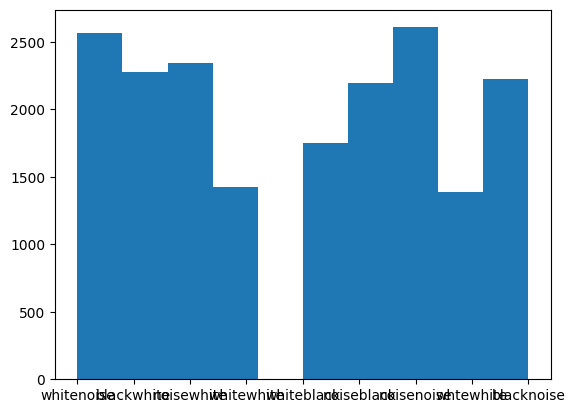

In [37]:
plt.hist(conditions.df.condition)

(0.0, 72.0)

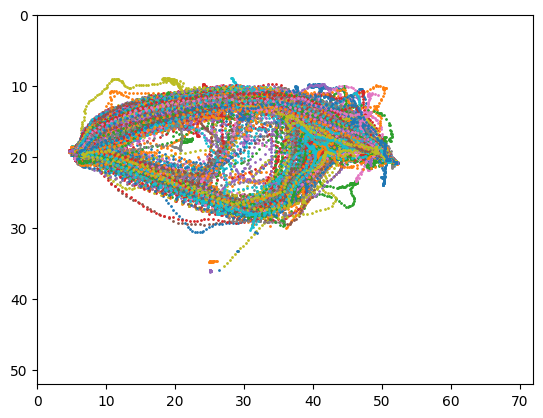

In [38]:
cluster_0_light = conditions.df[(conditions.df.obstacle_cluster == 3) & (conditions.df.odd == 'right' )&(conditions.df.start == 'top' )]
for ind, row in cluster_0_light.iterrows():
    plt.scatter(x = row['nose_x_cm'],y = row['nose_y_cm'] ,s=1)
plt.ylim([52,0]); plt.xlim([0, 72])

dark

dark.by_start_obstalce_average('dark')

In [66]:
session.obstacle_by_variable('date','tab10','light')

In [67]:
dark.obstacle_by_variable('date','tab10','dark')

In [252]:
dark.by_start_obstalce_average('dark')

(array([389.,   0., 444.,   0., 509.,   0., 529.,   0., 492., 517.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

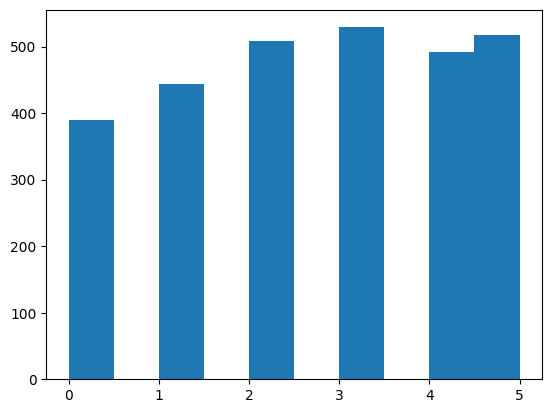

In [6]:
plt.hist(dark.df.obstacle_cluster)

(array([757.,   0., 736.,   0., 681.,   0., 657.,   0., 565., 674.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

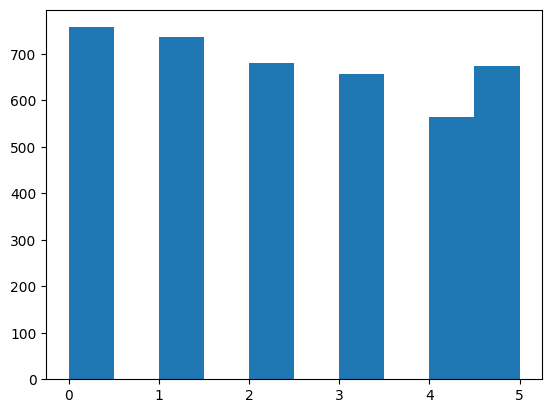

In [7]:
plt.hist(session.df.obstacle_cluster)

In [8]:
dark.df

,level_0,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,...,mean_mean_gt_obstacleBL_x,mean_mean_gt_obstacleBL_y,mean_mean_gt_obstacleTL_x_cm,mean_mean_gt_obstacleTL_y_cm,mean_mean_gt_obstacleTR_x_cm,mean_mean_gt_obstacleTR_y_cm,mean_mean_gt_obstacleBR_x_cm,mean_mean_gt_obstacleBR_y_cm,mean_mean_gt_obstacleBL_x_cm,mean_mean_gt_obstacleBL_y_cm
0,0,0,64915.523148,64918.775347,"[64915.528115, 64915.544896, 64915.561536, 649...","[540, 541, 542, 543, 544, 545, 546, 547, 548, ...","[93.8053970336914, 92.92668151855469, 92.60152...","[262.5429382324219, 263.65594482421875, 263.42...","[112.91676330566406, 111.78739166259766, 111.2...","[257.9234619140625, 258.3965759277344, 257.921...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,64918.775347,64921.798566,"[64918.778969, 64918.796723, 64918.812556, 649...","[[735, 736, 737, 738, 739, 740, 741, 742, 743,...","[676.229248046875, 678.3688354492188, 678.5172...","[280.1986389160156, 279.34014892578125, 279.42...","[667.1575927734375, 669.3810424804688, 668.289...","[275.3477783203125, 272.519775390625, 273.3495...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,64921.798566,64925.165734,"[64921.813696, 64921.83118, 64921.847052, 6492...","[917, 918, 919, 920, 921, 922, 923, 924, 925, ...","[95.15409851074219, 94.2234115600586, 94.51425...","[262.2293701171875, 263.2197265625, 264.313385...","[113.92466735839844, 112.84644317626953, 112.7...","[257.9330749511719, 258.80914306640625, 258.93...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,64929.479206,64932.383590,"[64929.48288, 64929.49966, 64929.517132, 64929...","[1377, 1378, 1379, 1380, 1381, 1382, 1383, 138...","[94.98332214355469, 93.73847198486328, 93.1007...","[262.4388427734375, 262.70660400390625, 262.69...","[113.64474487304688, 113.05989074707031, 112.1...","[256.3793029785156, 257.34747314453125, 257.83...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6,64935.836697,64938.609971,"[64935.851635, 64935.869478, 64935.885107, 649...","[1759, 1760, 1761, 1762, 1763, 1764, 1765, 176...","[94.91559600830078, 95.0887680053711, 93.86167...","[263.7718505859375, 262.8562316894531, 264.323...","[115.93388366699219, 114.1135025024414, 113.45...","[256.3660888671875, 257.00177001953125, 257.76...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2861,66,78,56029.032947,56032.629555,"[56029.040921, 56029.057792, 56029.075737, 560...","[[20991, 20992, 20993, 20994, 20995, 20996, 20...","[673.8978271484375, 674.8469848632812, 674.964...","[262.5647277832031, 262.437255859375, 261.6487...","[663.4574584960938, 664.0390014648438, 664.742...","[247.28787231445312, 247.69454956054688, 247.2...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2862,67,82,56099.096768,56101.353740,"[56099.098534, 56099.115302, 56099.131891, 560...","[[25193, 25194, 25195, 25196, 25197, 25198, 25...","[670.5661010742188, 671.2100830078125, 671.647...","[264.86920166015625, 265.5244445800781, 265.91...","[654.9926147460938, 659.0719604492188, 659.795...","[261.98809814453125, 261.3612365722656, 262.20...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2863,68,86,56174.215424,56176.300544,"[56174.224422, 56174.241344, 56174.257971, 561...","[[29699, 29700, 29701, 29702, 29703, 29704, 29...","[672.9276123046875, 672.8819580078125, 673.088...","[263.5447692871094, 263.9293518066406, 263.179...","[658.7747192382812, 657.934814453125, 661.1977...","[253.2012939453125, 259.48358154296875, 252.01...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2864,69,88,56214.630438,56217.481049,"[56214.638515, 56214.656128, 56214.672, 56214....","[[32123, 32124, 32125, 32126, 32127, 32128, 32...","[674.515625, 675.0423583984375, 674.5418701171...","[262.6737060546875, 263.87322998046875, 263.62...","[658.7216796875, 660.1640625, 660.551452636718...","[255.7362518310547, 256.15985107421875, 255.71...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
session.df

,level_0,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,...,mean_mean_gt_obstacleBL_x,mean_mean_gt_obstacleBL_y,mean_mean_gt_obstacleTL_x_cm,mean_mean_gt_obstacleTL_y_cm,mean_mean_gt_obstacleTR_x_cm,mean_mean_gt_obstacleTR_y_cm,mean_mean_gt_obstacleBR_x_cm,mean_mean_gt_obstacleBR_y_cm,mean_mean_gt_obstacleBL_x_cm,mean_mean_gt_obstacleBL_y_cm
0,0,0,53211.744908,53213.829939,"[53211.752614, 53211.7691, 53211.785804, 53211...","[475, 476, 477, 478, 479, 480, 481, 482, 483, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[121.4166259765625, 120.82239532470703, 120.37...","[274.6488952636719, 274.42120361328125, 273.41...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,53213.829939,53216.173107,"[53213.836569, 53213.853516, 53213.870016, 532...","[[600, 601, 602, 603, 604, 605, 606, 607, 608,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[679.168701171875, 681.370361328125, 682.83502...","[258.8583679199219, 260.7340393066406, 262.258...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,53216.173107,53219.183936,"[53216.187443, 53216.204134, 53216.220812, 532...","[741, 742, 743, 744, 745, 746, 747, 748, 749, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[119.02525329589844, 119.26132202148438, 121.6...","[271.8583984375, 271.8000183105469, 273.815063...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,53219.183936,53221.518886,"[53219.188428, 53219.205235, 53219.222745, 532...","[[921, 922, 923, 924, 925, 926, 927, 928, 929,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[677.5716552734375, 679.3147583007812, 680.650...","[257.8296813964844, 258.478515625, 259.3057861...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,53224.898291,53227.921459,"[53224.906867, 53224.923609, 53224.94039, 5322...","[[1264, 1265, 1266, 1267, 1268, 1269, 1270, 12...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[686.1226196289062, 686.0689086914062, 685.790...","[258.54180908203125, 258.1680908203125, 257.65...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3291,111,124,54898.765068,54900.424089,"[54898.773568, 54898.790272, 54898.807001, 548...","[[23463, 23464, 23465, 23466, 23467, 23468, 23...","[674.2321166992188, 674.8368530273438, 675.040...","[265.7942199707031, 266.59429931640625, 265.84...","[657.4315185546875, 659.6611938476562, 659.367...","[261.0271911621094, 260.18023681640625, 259.22...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3292,112,126,54924.544243,54926.480947,"[54924.549004, 54924.566528, 54924.582515, 549...","[[25009, 25010, 25011, 25012, 25013, 25014, 25...","[670.359130859375, 670.70166015625, 671.206298...","[265.92303466796875, 267.178955078125, 267.266...","[663.566650390625, 661.4872436523438, 668.9378...","[260.3570251464844, 259.66461181640625, 258.47...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3293,113,128,54932.945075,54936.865318,"[54932.952294, 54932.968742, 54932.985408, 549...","[[25513, 25514, 25515, 25516, 25517, 25518, 25...","[674.6268920898438, 674.2048950195312, 674.520...","[265.8502502441406, 265.3453369140625, 265.181...","[660.615478515625, 662.0647583007812, 662.9625...","[256.7518615722656, 256.586181640625, 256.3724...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3294,114,129,54936.865318,54938.589772,"[54936.870054, 54936.886835, 54936.904358, 549...","[25748, 25749, 25750, 25751, 25752, 25753, 257...","[95.02220916748047, 94.93165588378906, 94.9181...","[259.58026123046875, 258.3529357910156, 258.71...","[101.6077880859375, 101.23881530761719, 101.49...","[259.9896240234375, 260.0871887207031, 260.060...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [17]:
cluster_0 = session.df[session.df.obstacle_cluster == 0]

In [223]:
session.df.leftportT_x_cm.unique()

array([8.13792984])

In [225]:
dark.df.rightportT_x_cm.unique()

array([50.60070276])

In [237]:
obstacle_by_variable()

NameError: name 'obstacle_by_variable' is not defined

In [86]:
cluster_0_light = session.df[(session.df.obstacle_cluster == 1) & (session.df.odd == 'right' )&(session.df.start == 'bottom' )]

In [83]:
cluster_0_light

,level_0,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,...,mean_mean_gt_obstacleBL_x,mean_mean_gt_obstacleBL_y,mean_mean_gt_obstacleTL_x_cm,mean_mean_gt_obstacleTL_y_cm,mean_mean_gt_obstacleTR_x_cm,mean_mean_gt_obstacleTR_y_cm,mean_mean_gt_obstacleBR_x_cm,mean_mean_gt_obstacleBR_y_cm,mean_mean_gt_obstacleBL_x_cm,mean_mean_gt_obstacleBL_y_cm
80,93,99,53455.325708,53457.980147,"[53455.336832, 53455.353036, 53455.369702, 534...","[[15085, 15086, 15087, 15088, 15089, 15090, 15...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[680.1940307617188, 681.7393798828125, 682.107...","[261.1452941894531, 261.32763671875, 262.79589...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,95,101,53460.302745,53462.572070,"[53460.304768, 53460.321395, 53460.338547, 534...","[[15383, 15384, 15385, 15386, 15387, 15388, 15...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[678.2451171875, 679.60302734375, 680.19274902...","[261.8411560058594, 261.09136962890625, 259.89...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,63,67,52804.388160,52806.649305,"[52804.391667, 52804.407244, 52804.424038, 528...","[[12470, 12471, 12472, 12473, 12474, 12475, 12...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[680.9953002929688, 682.6031494140625, 683.956...","[259.423583984375, 260.9930114746094, 261.9325...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,110,123,53050.389862,53052.909158,"[53050.392102, 53050.408857, 53050.425574, 530...","[[27225, 27226, 27227, 27228, 27229, 27230, 27...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[680.1568603515625, 681.498291015625, 682.4844...","[260.037109375, 258.18878173828125, 259.526702...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,26,29,53937.240076,53940.619635,"[53937.251699, 53937.268518, 53937.28576, 5393...","[[5686, 5687, 5688, 5689, 5690, 5691, 5692, 56...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[676.51171875, 678.1774291992188, 679.25854492...","[262.5358581542969, 262.3407287597656, 262.042...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,76,87,56459.749235,56462.731545,"[56459.764992, 56459.781696, 56459.798169, 564...","[[12981, 12982, 12983, 12984, 12985, 12986, 12...","[676.4712524414062, 677.0319213867188, 677.387...","[266.0512390136719, 266.58258056640625, 266.88...","[665.8178100585938, 667.3980712890625, 668.418...","[257.6266784667969, 256.9039306640625, 256.984...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3196,6,7,54526.255219,54528.352486,"[54526.260825, 54526.277683, 54526.295116, 545...","[[1120, 1121, 1122, 1123, 1124, 1125, 1126, 11...","[675.4373168945312, 676.1847534179688, 676.827...","[263.7162170410156, 265.3633728027344, 265.921...","[665.5468139648438, 666.253662109375, 666.7947...","[254.4312744140625, 255.24090576171875, 255.54...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3224,38,40,54605.380236,54608.882752,"[54605.388339, 54605.405081, 54605.421772, 546...","[[5866, 5867, 5868, 5869, 5870, 5871, 5872, 58...","[675.8048706054688, 676.282958984375, 676.8209...","[266.595703125, 266.7735900878906, 266.9604492...","[663.1414794921875, 665.4722900390625, 666.042...","[257.5790710449219, 257.95416259765625, 257.90...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3239,53,56,54643.586918,54645.405657,"[54643.601702, 54643.619251, 54643.634956, 546...","[[8158, 8159, 8160, 8161, 8162, 8163, 8164, 81...","[675.6221313476562, 676.3464965820312, 676.304...","[265.0816650390625, 265.4820556640625, 265.982...","[662.6888427734375, 665.14697265625, 665.63806...","[256.2571716308594, 256.856201171875, 256.7221...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

(0.0, 72.0)

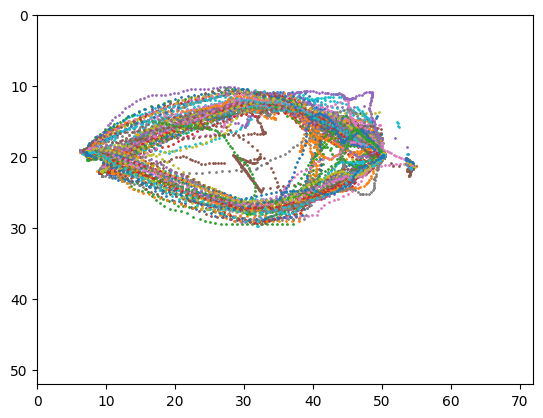

In [153]:
cluster_0_light = session.df[(session.df.obstacle_cluster == 3) & (session.df.odd == 'right' )&(session.df.start == 'top' )]
for ind, row in cluster_0_light.iterrows():
    plt.scatter(x = row['nose_x_cm'],y = row['nose_y_cm'] ,s=1)
plt.ylim([52,0]); plt.xlim([0, 72])


In [91]:
x = flatten_column(cluster_0_light,'nose_x_cm')
y = flatten_column(cluster_0_light,'nose_y_cm')
x = x[~np.isnan(x)]
y = y[~np.isnan(y)]

print(len(x),len(y))

23346 23346


(0.0, 72.0)

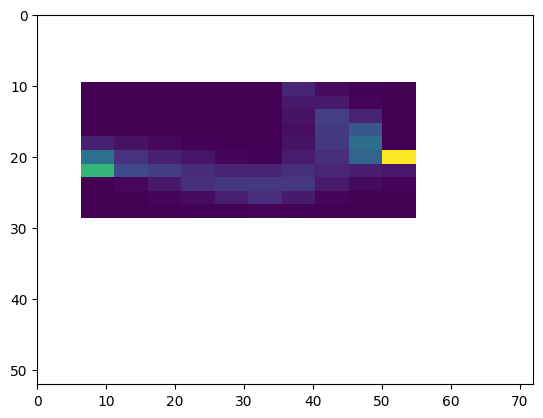

In [92]:
Z, xedges, yedges = np.histogram2d(x, y)
plt.pcolormesh(xedges, yedges, Z.T)
plt.ylim([52,0]); plt.xlim([0, 72])

(0.0, 72.0)

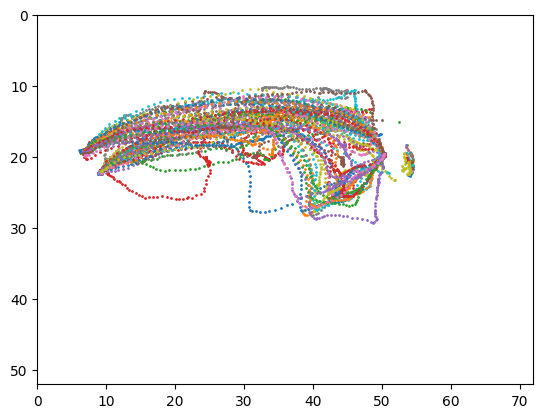

In [215]:
cluster_0_light = session.df[(session.df.obstacle_cluster == 5) & (session.df.odd == 'right' )&(session.df.start == 'top' )]
for ind, row in cluster_0_light.iterrows():
    plt.scatter(x = row['nose_x_cm'],y = row['nose_y_cm'] ,s=1)
plt.ylim([52,0]); plt.xlim([0, 72])

In [16]:
cluster_0_light = session.df[(session.df.obstacle_cluster == 0) & (session.df.odd == 'right' )&(session.df.start == 'bottom' )]
for ind, row in cluster_0_light.iterrows():
    plt.scatter(x = row['nose_x_cm'],y = row['nose_y_cm'] ,s=1)
plt.ylim([52,0]); plt.xlim([0, 72])


IndexError: index 237 is out of bounds for axis 0 with size 159

In [10]:
cluster_0_light.rightportT_x_cm.unique()

array([52.97216475])

In [22]:
cluster_0_light.leftportT_x_cm.unique()

array([7.81501751])

In [43]:
y

array([21.80269393, 22.16067515, 22.33064634, ..., 19.42582911,
       19.35667288, 19.38363365])

In [ ]:
def 

In [69]:
x = flatten_column(cluster_0_light,'nose_x_cm')
y = flatten_column(cluster_0_light,'nose_y_cm')
x = x[~np.isnan(x)]
x1=x[np.where((x>cluster_0_light.leftportT_x_cm.unique()) & (x<cluster_0_light.rightportT_x_cm.unique()) )]
y = y[~np.isnan(y)]
y1=y[np.where((x>cluster_0_light.leftportT_x_cm.unique()) & (x<cluster_0_light.rightportT_x_cm.unique()) )]

print(len(x),len(y))

29386 29386


(0.0, 72.0)

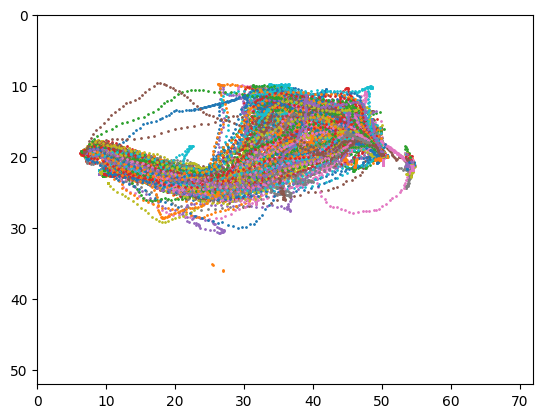

In [68]:
cluster_0_light = session.df[(session.df.obstacle_cluster == 0) & (session.df.odd == 'right' )&(session.df.start == 'top' )]
for ind, row in cluster_0_light.iterrows():
    plt.scatter(x = row['nose_x_cm'],y = row['nose_y_cm'] ,s=1)
plt.ylim([52,0]); plt.xlim([0, 72])


In [58]:
x[np.where((x>cluster_0_light.leftportT_x_cm.unique()) & (x<cluster_0_light.rightportT_x_cm.unique()) )]

array([50.67437643, 50.68431322, 50.67218295, ...,  8.7475577 ,
        8.1899746 ,  7.88665818])

(0.0, 72.0)

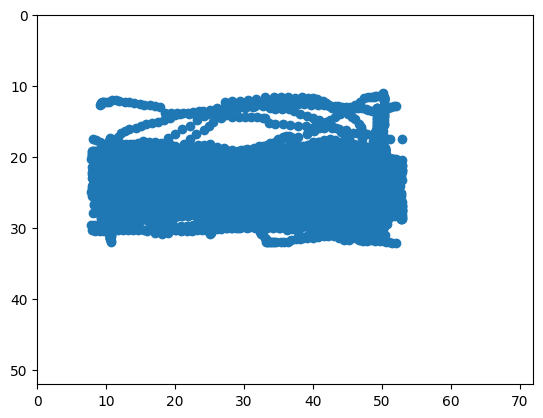

In [40]:
plt.scatter(x=x,y=y)
plt.ylim([52,0]); plt.xlim([0, 72])


(0.0, 72.0)

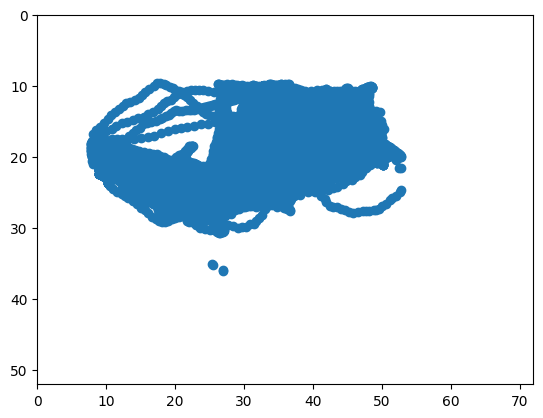

In [60]:
plt.scatter(x=x[np.where((x>cluster_0_light.leftportT_x_cm.unique()) & (x<cluster_0_light.rightportT_x_cm.unique()) )],y=y[np.where((x>cluster_0_light.leftportT_x_cm.unique()) & (x<cluster_0_light.rightportT_x_cm.unique()) )])
plt.ylim([52,0]); plt.xlim([0, 72])

(52.0, 0.0)

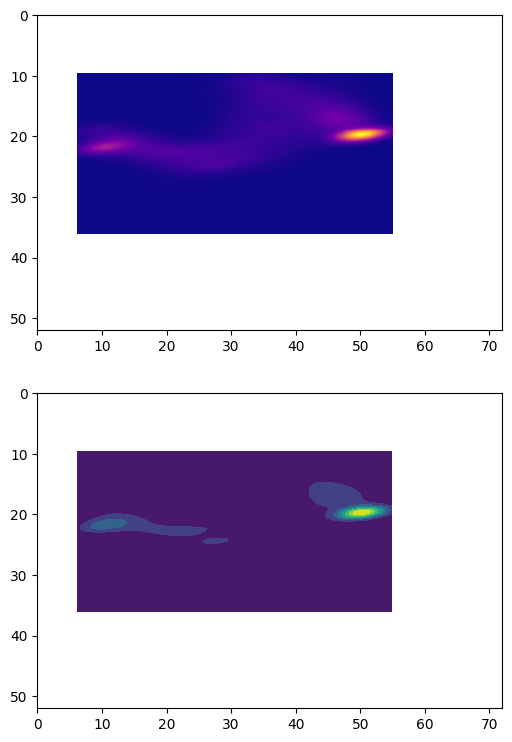

In [70]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x1, y1]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
fig = plt.figure(figsize=(6,9))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# alpha=0.5 will make the plots semitransparent
ax1.pcolormesh(xi, yi, zi.reshape(xi.shape),cmap='plasma')
ax2.contourf(xi, yi, zi.reshape(xi.shape))

ax1.set_xlim([0, 72])
ax1.set_ylim([52,0])
ax2.set_xlim([0, 72])
ax2.set_ylim([52,0])

(52.0, 0.0)

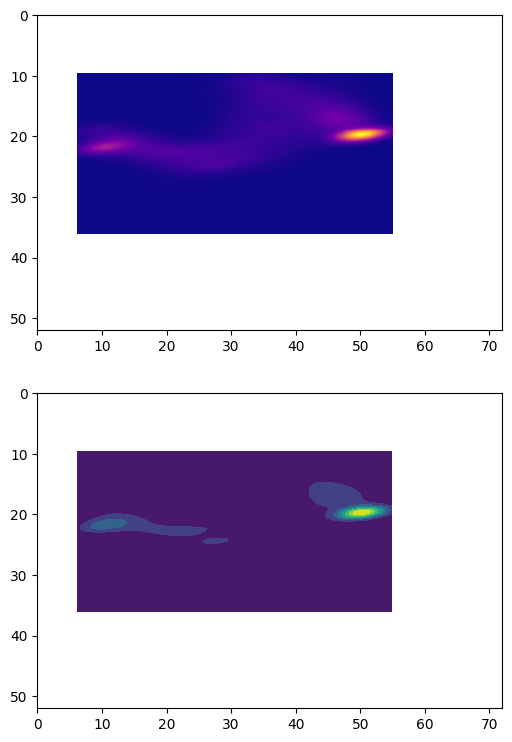

In [71]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x1, y1]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
fig = plt.figure(figsize=(6,9))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# alpha=0.5 will make the plots semitransparent
ax1.pcolormesh(xi, yi, zi.reshape(xi.shape),cmap='plasma')
ax2.contourf(xi, yi, zi.reshape(xi.shape))

ax1.set_xlim([0, 72])
ax1.set_ylim([52,0])
ax2.set_xlim([0, 72])
ax2.set_ylim([52,0])
#plt.ylim([52,0]); plt.xlim([0, 72])

# you can also overlay your soccer field

#ax1.imshow(im#, extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')
#ax2.imshow(im, extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')

(0.0, 72.0)

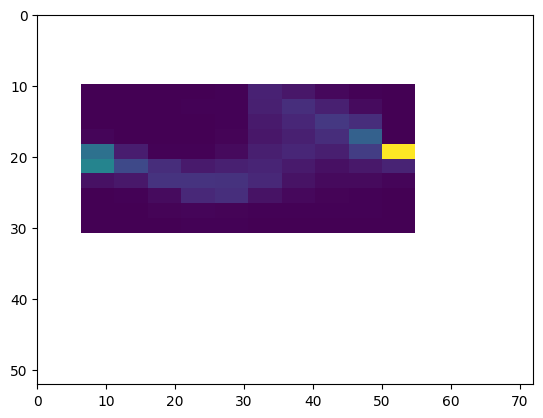

In [145]:
Z, xedges, yedges = np.histogram2d(x, y)
plt.pcolormesh(xedges, yedges, Z.T)
plt.ylim([52,0]); plt.xlim([0, 72])

(0.0, 72.0)

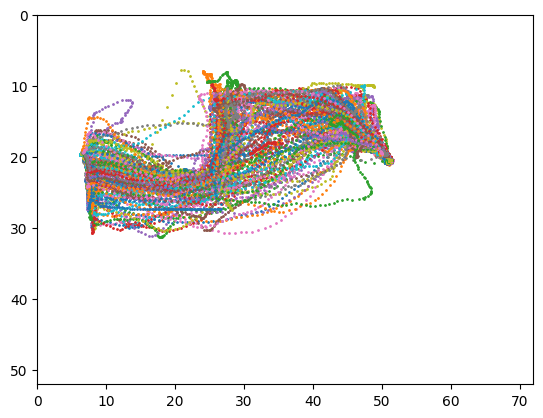

In [54]:
cluster_0_dark = dark.df[(dark.df.obstacle_cluster == 0) & (dark.df.odd == 'right' )&(dark.df.start == 'top' )]
for ind, row in cluster_0_dark.iterrows():
    plt.scatter(x = row['nose_x_cm'],y = row['nose_y_cm'] ,s=1)
plt.ylim([52,0]); plt.xlim([0, 72])


In [55]:
x = flatten_column(cluster_0_dark,'nose_x_cm')
y = flatten_column(cluster_0_dark,'nose_y_cm')
x = x[~np.isnan(x)]
x1=x[np.where((x>cluster_0_dark.leftportT_x_cm.unique()) & (x<cluster_0_light.rightportT_x_cm.unique()) )]
y = y[~np.isnan(y)]
y1=y[np.where((x>cluster_0_dark.leftportT_x_cm.unique()) & (x<cluster_0_light.rightportT_x_cm.unique()) )]

print(len(x),len(y))

23306 23306


In [197]:
x = flatten_column(cluster_0_dark,'nose_x_cm')
y = flatten_column(cluster_0_dark,'nose_y_cm')
x = x[~np.isnan(x)]
y = y[~np.isnan(y)]

print(len(x),len(y))

5702 5702


(52.0, 0.0)

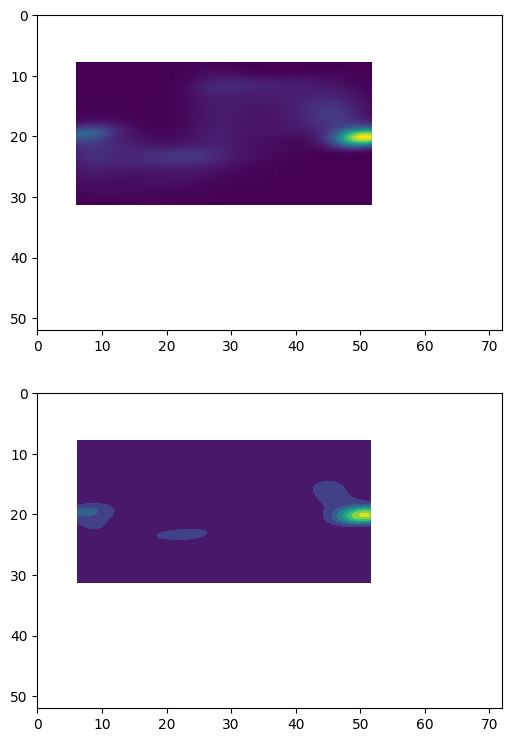

In [56]:
k = gaussian_kde(np.vstack([x1, y1]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
fig = plt.figure(figsize=(6,9))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# alpha=0.5 will make the plots semitransparent
ax1.pcolormesh(xi, yi, zi.reshape(xi.shape))
ax2.contourf(xi, yi, zi.reshape(xi.shape))

ax1.set_xlim([0, 72])
ax1.set_ylim([52,0])
ax2.set_xlim([0, 72])
ax2.set_ylim([52,0])
#plt.ylim([52,0]); plt.xlim([0, 72])

# you can also overlay your soccer field

#ax1.imshow(im#, extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')
#ax2.imshow(im, extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')

In [114]:
from scipy import stats
x = stats.zscore(x)
y = stats.zscore(y)

In [116]:
x

array([ 1.36046974,  1.36608979,  1.36721107, ..., -1.21889956,
       -1.22088605, -1.21897542])

(0.0, 72.0)

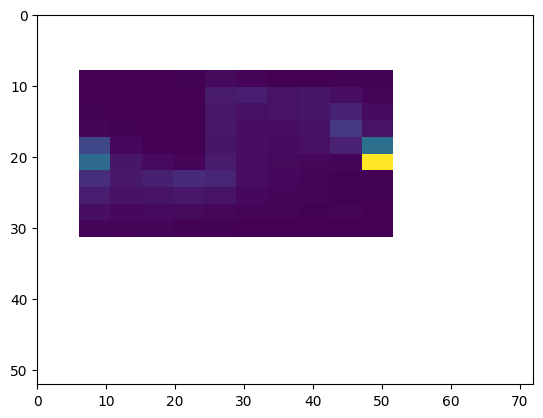

In [149]:
Z, xedges, yedges = np.histogram2d(x, y)
plt.pcolormesh(xedges, yedges, Z.T)
plt.ylim([52,0]); plt.xlim([0, 72])

In [11]:
df = pd.read_hdf(r"D:\obstacle_avoidance\recordings\061323\G8CKTT\oa\processed_G8CKTT_061323_oa.h5")

In [12]:
test= plot_oa('blank',df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


KeyError: 'resample_angle_to_leftport'

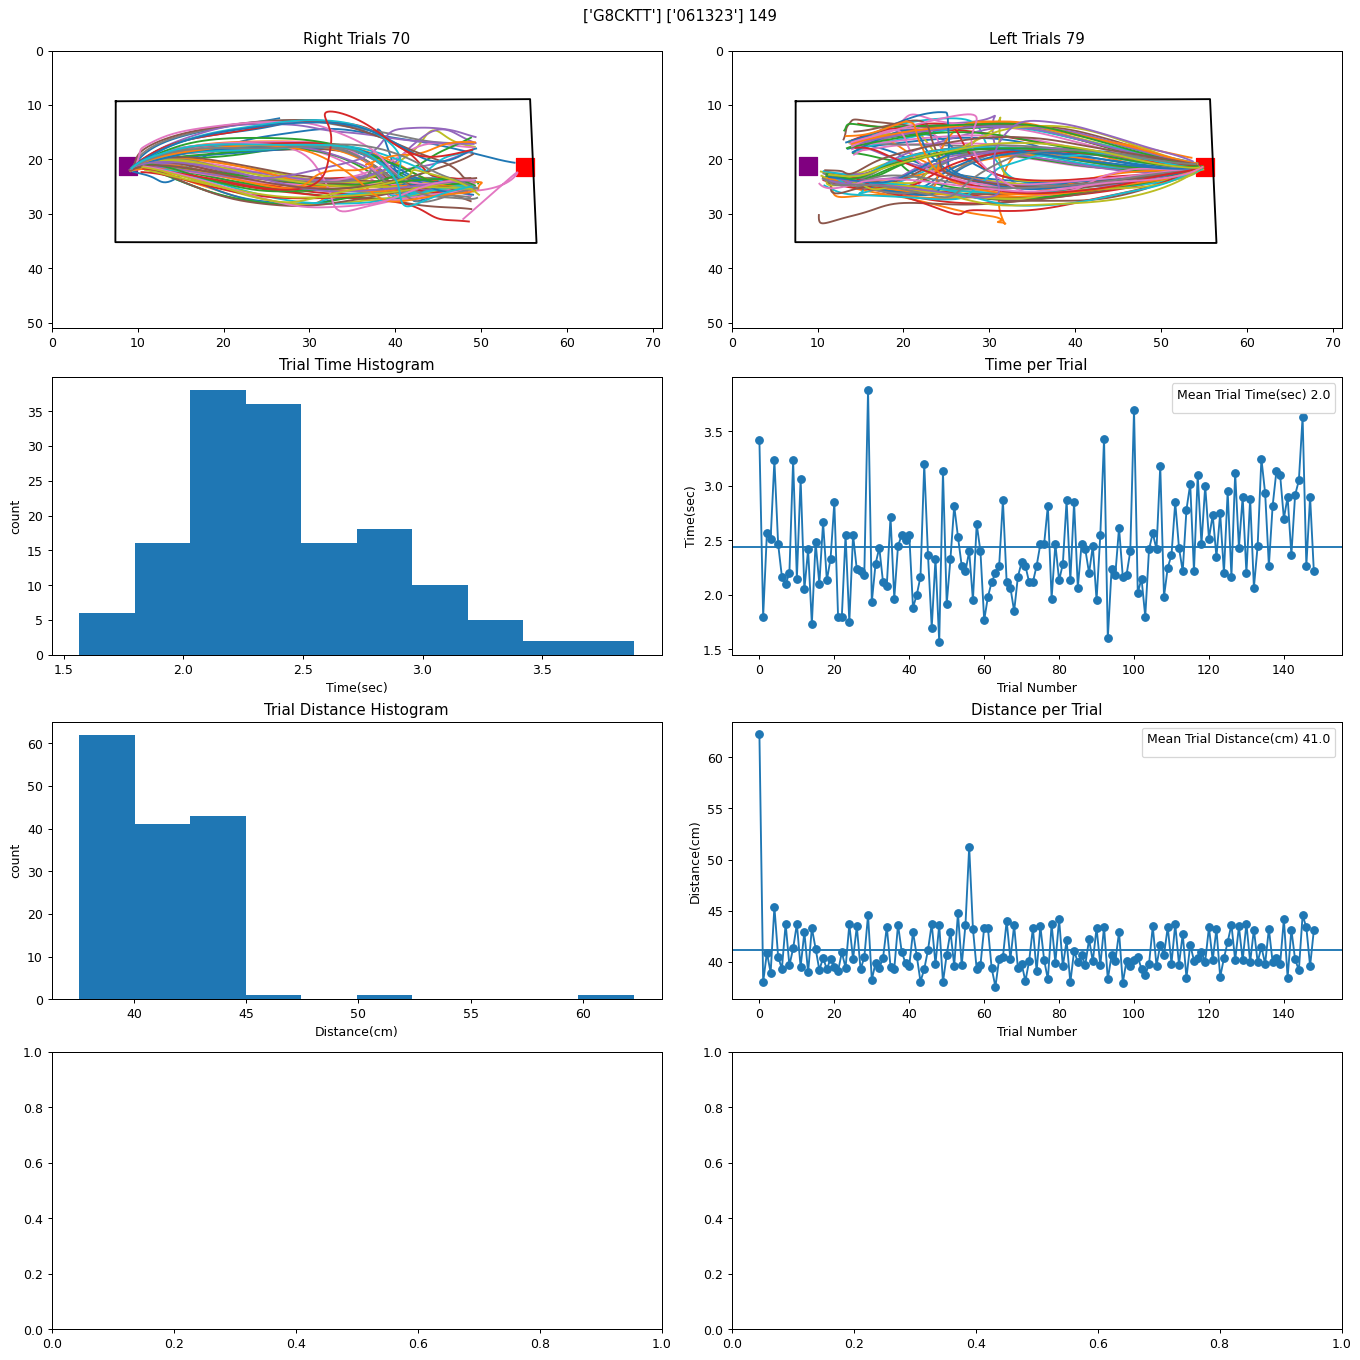

In [13]:
test.train_day_summary()